# Importing Necessary Packages & Reading Data:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
data = open("data2.txt","r")
x = np.array([])
y = np.array([])

#Read Data from File:
for Each_line in data:
  fields = Each_line.split(",")
  x = np.append(x,[float(fields[0])],axis = 0)
  y = np.append(y,[float(fields[1])],axis = 0)
data.close()

**Visualising Data:**

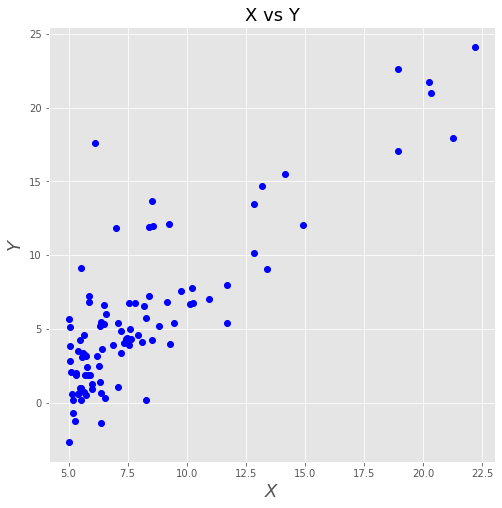

In [14]:
plt.figure(figsize=(8, 8))
plt.style.use('ggplot')
plt.xlabel("$X$", fontsize = 18)
plt.title("X vs Y", fontsize = 18)
plt.ylabel("$Y$", fontsize = 18)
plt.plot(x,y,'bo',)
plt.show()

# **Solving Using Normal Equation:**

In [3]:
#Constructing Design Matrix
X = np.c_[np.ones((len(x),1)),x]

#Solving using Normal Equation
X_T = np.transpose(X)
X_dot = X_T.dot(X)
X_inv = np.linalg.inv(X_dot)
X_invdotT = X_inv.dot(X_T)
Theta = X_invdotT.dot(y)

**Visualising the results obtained:**

Parameters (w0): -3.8958
Parameters (w1): 1.1930


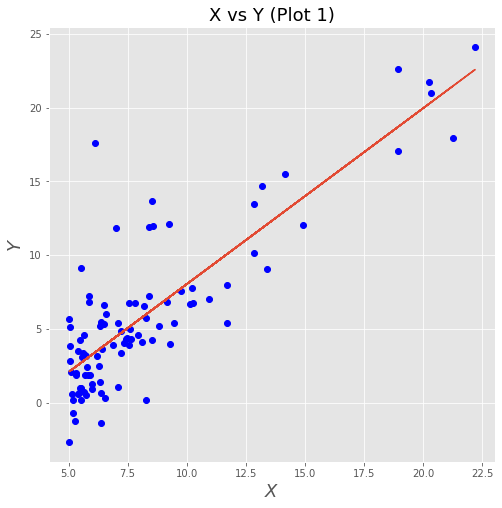

In [4]:
print("Parameters (w0): {:.4f}".format(Theta[0]))
print("Parameters (w1): {:.4f}".format(Theta[1]))
plt.figure(figsize=(8, 8))
ynew = Theta[0] + Theta[1] * x
#print(ynew)
plt.style.use('ggplot')
plt.xlabel("$X$", fontsize = 18)
plt.title("X vs Y (Plot 1)", fontsize = 18)
plt.ylabel("$Y$", fontsize = 18)
plt.plot(x,y,'bo',x,ynew)
plt.show()

# **Batch Gradient Descent:**

In [5]:
def gradient_descent(x,y,iteration,alpha):
    w0 = w1 = 0
    theta = np.zeros((1,2))
    n = len(x)
    cost_history = np.zeros(iteration)
    for i in range(iteration):
        ynew = theta[0,0] + theta[0,1] * x 
        cost_history[i] = (1/n) * sum([val**2 for val in (y-ynew)])
        w1_derivative = -(2/n)*sum(x*(y-ynew))
        w0_derivative = -(2/n)*sum(y-ynew)
        theta[0,0] = theta[0,0] - alpha * w0_derivative
        theta[0,1] = theta[0,1] - alpha * w1_derivative
        #print ("w0 {}, w1 {}, cost {} iteration {}".format(theta[0,0],theta[0,1],cost_history[i], i))
    return theta, cost_history
alpha , iteration, obs = 0.012, 1501, 1500
theta,cost_hist = gradient_descent(x,y,iteration,alpha)

**Visualising the results obtained:**

Parameters (w0): -3.8899
Parameters (w1): 1.1924


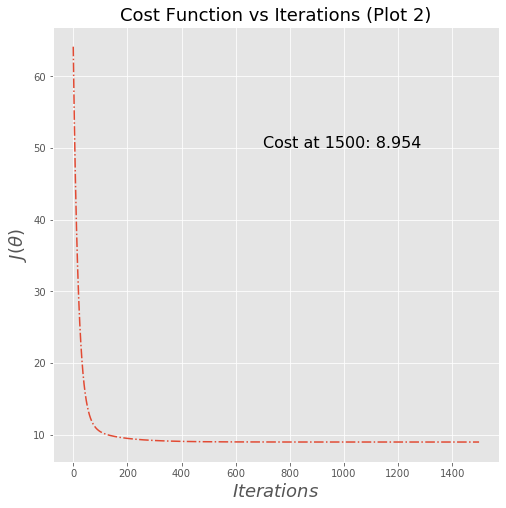

In [6]:
plt.figure(figsize=(8, 8))
print("Parameters (w0): {:.4f}".format(theta[0,0]))
print("Parameters (w1): {:.4f}".format(theta[0,1]))
plt.ylabel(r"$J(\theta)$", fontsize = 18)
plt.title("Cost Function vs Iterations (Plot 2)", fontsize = 18)
plt.xlabel("$Iterations$", fontsize = 18)
plt.plot(range(obs), cost_hist[:obs], '-.',markersize = 10)
plt.text(obs-800, 50, str("Cost at {}: {:.3f}".format(obs,cost_hist[obs])), {'color': 'k', 'fontsize':16})
plt.show()

**Fit the obtained polynomial parameters to the data**:

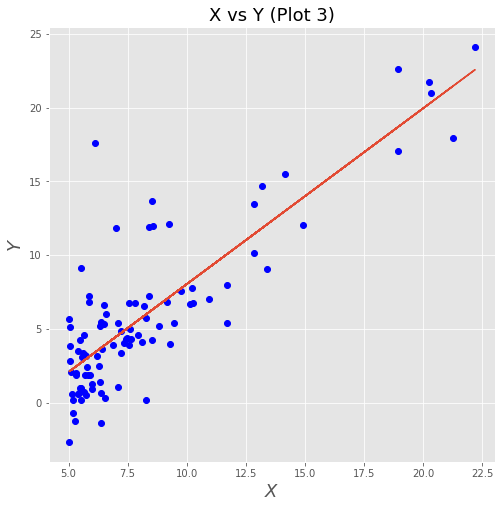

In [7]:
plt.figure(figsize=(8, 8))
ynew = theta[0,0] + theta[0,1] * x
#print(ynew)
plt.style.use('ggplot')
plt.xlabel("$X$", fontsize = 18)
plt.title("X vs Y (Plot 3)", fontsize = 18)
plt.ylabel("$Y$", fontsize = 18)
plt.plot(x,y,'bo',x,ynew,'-')
plt.show()

# **Stochastic Gradient Descent:**

In [8]:
def stochastic_gradient_descent(x,y,iteration,alpha):
    theta = np.zeros((1,2))
    n = len(x)
    cost_history = np.zeros(iteration)
    for i in range(iteration):
        cost = 0
        for it in range(n):
            rand_num = np.random.randint(0,n)
            x_i = x[rand_num:]
            y_i = y[rand_num:]
            ynew = theta[0,0] + theta[0,1] * x_i 
            cost = cost + (1/n) * sum([val**2 for val in (y_i-ynew)])
            w1_derivative = -(2/n)*sum(x_i*(y_i-ynew))
            w0_derivative = -(2/n)*sum(y_i-ynew)
            theta[0,0] = theta[0,0] - alpha * w0_derivative
            theta[0,1] = theta[0,1] - alpha * w1_derivative
        cost_history[i] = cost/100 #Scaling cost function
    return theta, cost_history
alpha , iteration, obs = 0.012, 21, 20 
theta,cost_hist = stochastic_gradient_descent(x,y,iteration,alpha)

**Visualising the results obtained:**

Parameters (w0): -4.6803
Parameters (w1): 1.1271


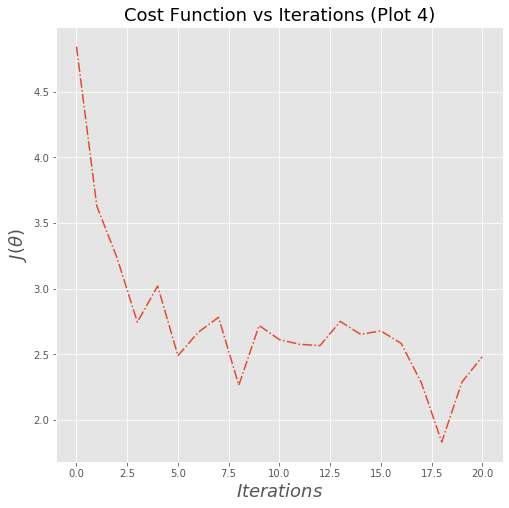

In [9]:
plt.figure(figsize=(8, 8))
print("Parameters (w0): {:.4f}".format(theta[0,0]))
print("Parameters (w1): {:.4f}".format(theta[0,1]))
plt.ylabel(r"$J(\theta)$", fontsize = 18)
plt.title("Cost Function vs Iterations (Plot 4)", fontsize = 18)
plt.xlabel("$Iterations$", fontsize = 18)
plt.plot(list(range(iteration)),list(cost_hist), '-.',markersize = 10)
#plt.text(obs-(obs*0.7), 16, str("Cost at {}: {:.3f}".format(obs,cost_hist[obs])), {'color': 'k', 'fontsize':16})
plt.show()

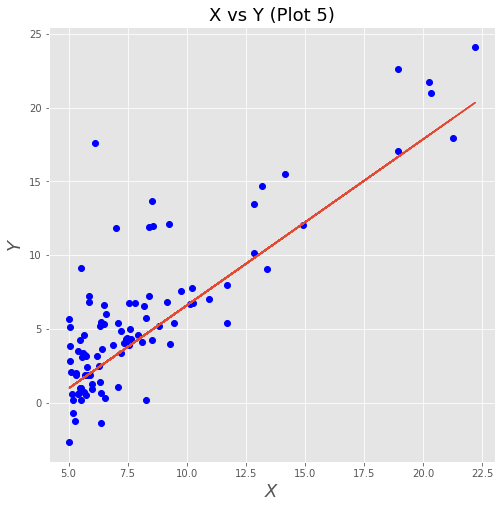

In [10]:
plt.figure(figsize=(8, 8))
ynew = theta[0,0] + theta[0,1] * x
#print(ynew)
plt.style.use('ggplot')
plt.xlabel("$X$", fontsize = 18)
plt.title("X vs Y (Plot 5)", fontsize = 18)
plt.ylabel("$Y$", fontsize = 18)
plt.plot(x,y,'bo',x,ynew,'-')
plt.show()

Refer Plot 2 and Plot 4. 

**Accuracy:** Batch Gradient descent is more accurate than Stochastic Gradient Descent(considering Normal equation output as ideal parameters)

**Convergence:** Stochastic mode converges faster than batch mode

**Compuatations:** Stochastic mode is more faster as smaller amount of data is used to calculate the parameters, while in batch mode whole data set will be utilised.

**In summary, Batch mode will converge slowly as whole data set will be used to predict, but the prediction will be more reliable than the stochastic mode.**

# Part 3 using Batch Gradient Descent: 

In [11]:
def gradient_descent(x,y,iteration,alpha):
    w0 = w1 = 0
    theta = np.zeros((1,2))
    n = len(x)
    cost_history = np.zeros(iteration)
    for i in range(iteration):
        ynew = theta[0,0] + theta[0,1] * x 
        cost_history[i] = (1/n) * sum([val**2 for val in (y-ynew)])
        w1_derivative = -(2/n)*sum(x*(y-ynew))
        w0_derivative = -(2/n)*sum(y-ynew)
        theta[0,0] = theta[0,0] - alpha * w0_derivative
        theta[0,1] = theta[0,1] - alpha * w1_derivative
        #print ("w0 {}, w1 {}, cost {} iteration {}".format(theta[0,0],theta[0,1],cost_history[i], i))
    return cost_history[-1]

**Note:** It will taken approx half a minute to execute below cell, please wait till it runs successfully

In [12]:
learning_rate = [0.01,0.001,0.005,0.0001]
it = [1500,10000,2800,80000]
cost=[]
for i in range(len(it)):
    cost.append(gradient_descent(x,y,it[i],learning_rate[i]))
it[:] = [x/50 for x in it] #scaling down the iterations for printing

**Visualising the results obtained:**

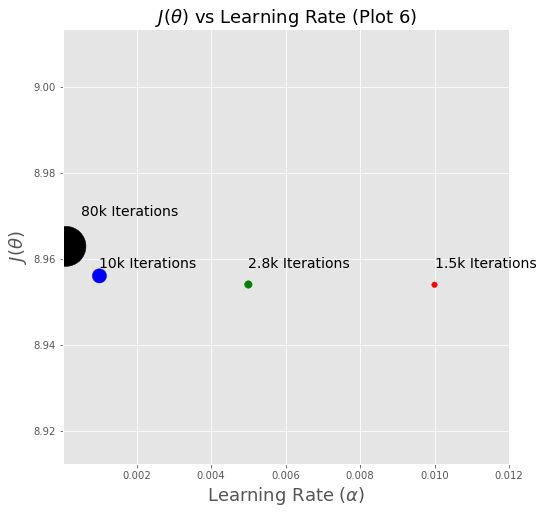

In [13]:
plt.figure(figsize=(8, 8))
plt.xlabel(r"Learning Rate ($\alpha$)", fontsize = 18)
plt.xlim(0.00001,0.012)
plt.title(r"$J(\theta)$ vs Learning Rate (Plot 6)", fontsize = 18)
plt.ylabel(r"$J(\theta)$", fontsize = 18)
plt.scatter(learning_rate,cost,s = it,c = ['red','blue','green','black'])
plt.text(0.0005,8.97,"80k Iterations",fontsize = 14)
plt.text(0.001,8.958,"10k Iterations",fontsize = 14)
plt.text(0.005,8.958,"2.8k Iterations",fontsize = 14)
plt.text(0.01,8.958,"1.5k Iterations",fontsize = 14)
plt.show()

 
From this excersise I infer that lower the learning rate higher will be the iteration need for the algorithm to acheive the global minimum. Also, learning rate cannot be too high, as there are chance of missing the global minimum and hence our cost function will never converge. 
Reffering to the above graph, I conclude at **learning rate = 0.01** with **iterations = 1500** and **cost = 8.96293** a global minimum is acheived with an optimum performance.
